In [1]:
#Mount drive in Colab enviroment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import proper libraries
import sys
import cv2
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#Define directories for training images
green_dir = "/content/drive/MyDrive/Traffic_Light_Detection/saved_images/green"
yellow_dir = "/content/drive/MyDrive/Traffic_Light_Detection/saved_images/yellow"
red_dir = "/content/drive/MyDrive/Traffic_Light_Detection/saved_images/red"

Sort through directories and assign proper labels

In [4]:
#Define lists for training images
red_images = []
yellow_images = []
green_images = []

#Define new size of image to be resized when loading
new_size = (180, 180)

#Create loops to load image from directory using cv2, resize the image, and append it to the appropriate list

#Load red pictures and assign a label
files = os.listdir(red_dir)
for file_name in files:
  if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
    file_path = os.path.join(red_dir, file_name)
    image = cv2.imread(file_path)
    resized_img = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    red_images.append(resized_img)

#Load yellow pictures and assign a label
files = os.listdir(yellow_dir)
for file_name in files:
  if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
    file_path = os.path.join(yellow_dir, file_name)
    image = cv2.imread(file_path)
    resized_img = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    yellow_images.append(resized_img)

#Load green pictures and assign a label
files = os.listdir(green_dir)
for file_name in files:
  if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
    file_path = os.path.join(green_dir, file_name)
    image = cv2.imread(file_path)
    resized_img = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    green_images.append(resized_img)

In [5]:
#View amount of data for each label
print(len(red_images))
print(len(yellow_images))
print(len(green_images))
#View shape to assure resized correctly
print(red_images[0].shape)

62
65
26
(180, 180, 3)


In [6]:
#Define lists to hold images and associated labels
image_data = []
label_data = []

#Create loops to append images into same list and add associated label to label list

#Add red images to data train
for image in red_images:
  image_data.append(image)
  label_data.append(0)

#Add yellow images to data train
for image in yellow_images:
  image_data.append(image)
  label_data.append(1)

#Add green images to data train
for image in green_images:
  image_data.append(image)
  label_data.append(2)

In [7]:
#Assure proper labels are indexed
print(label_data[1]) #Should be red (0)
print(label_data[78]) #Should be yellow (1)
print(label_data[135]) #Should be green (2)

0
1
2


In [8]:
#Perform a training/test split on the data and make sure to shuffle data for even split
x_train, x_test, y_train, y_test = train_test_split(image_data, label_data, test_size = 0.2, shuffle = True)

#Change train data to numpy array and label to integer
x_train = np.array(x_train)
y_train = [int(y) for y in y_train]
y_train = np.array(y_train)

#Change test data to numpy array and label to integer
x_test = np.array(x_test)
y_test = [int(y) for y in y_test]
y_test = np.array(y_test)

Build and Train the Model

In [9]:
#Specify input parameters
batch_size = 32
img_height = 180
img_width = 180

In [10]:
#Build the sequential Convolutional Neural Network
model = models.Sequential()

#Add desired layers below:

#Rescaling layer reshapes image to the proper input size and normalizes the image
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#1st set of convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#2nd set of convolutional and pooling layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#3rd set of convolutional and pooling layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#4th set of convolutional and pooling layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#Final convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Flattens the image to 1 dimension
model.add(layers.Flatten())
#Dense layer for classification
model.add(layers.Dense(64, activation='relu'))
#Final output layer, 3 neurons as 3 light classifications
model.add(layers.Dense(3))

In [11]:
#Veiw summary of the model including number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

In [12]:
#Compile the model to prepare it for training
model.compile(
    optimizer='adam', #Adam optimizer for adaptive moment estimation
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #Loss function for multiclass classifier
    metrics=['accuracy']) #Specify desired metrics to be monitored

Evaluate and save the trained model

In [13]:
#Train the model for 35 epochs, save training metrics for later display
history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_test, y_test))

Epoch 1/40
4/4 [==============================] - 10s 2s/step - loss: 1.0786 - accuracy: 0.2705 - val_loss: 1.1640 - val_accuracy: 0.2903
Epoch 2/40
4/4 [==============================] - 6s 2s/step - loss: 1.0071 - accuracy: 0.4344 - val_loss: 1.0945 - val_accuracy: 0.5484
Epoch 3/40
4/4 [==============================] - 9s 2s/step - loss: 0.9994 - accuracy: 0.5000 - val_loss: 1.1488 - val_accuracy: 0.5161
Epoch 4/40
4/4 [==============================] - 7s 2s/step - loss: 0.9908 - accuracy: 0.4180 - val_loss: 1.1435 - val_accuracy: 0.4194
Epoch 5/40
4/4 [==============================] - 8s 2s/step - loss: 0.9823 - accuracy: 0.5574 - val_loss: 1.0986 - val_accuracy: 0.5806
Epoch 6/40
4/4 [==============================] - 7s 2s/step - loss: 0.9756 - accuracy: 0.5410 - val_loss: 1.1394 - val_accuracy: 0.5806
Epoch 7/40
4/4 [==============================] - 7s 2s/step - loss: 0.9556 - accuracy: 0.5328 - val_loss: 1.0800 - val_accuracy: 0.5484
Epoch 8/40
4/4 [========================

1/1 - 1s - loss: 0.7345 - accuracy: 0.9355 - 535ms/epoch - 535ms/step


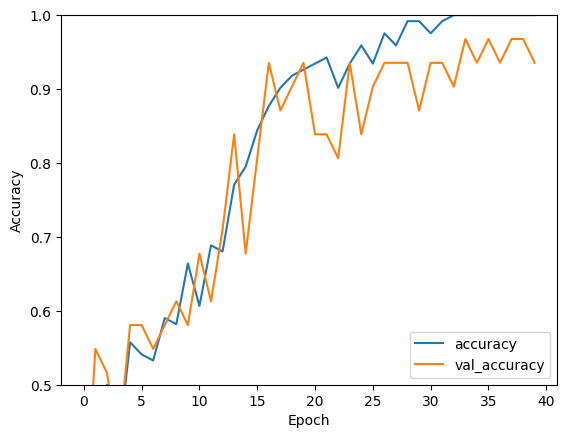

In [14]:
#Display model metrics recorded during training (look for signs of overfitting)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#Test models accuracy on test data
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [15]:
#Create directory to save model if it does not exist
model_dir = "/content/drive/MyDrive/Traffic_Light_Detection/saved_models/"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

#Give the saved model a name
model_name = 'CNN_1'

#Save the trained model
model.save(os.path.join(model_dir, model_name))

Reload the saved model and view summary/test accuracy

In [16]:
#Specify saved model directory
model_dir = "/content/drive/MyDrive/Traffic_Light_Detection/saved_models/"

#Recall specific model you wish to reload
model_name = 'CNN_1'

#Load the saved model
new_model = tf.keras.models.load_model(os.path.join(model_dir, model_name))

In [17]:
#View summary of the saved model and test its performance
new_model.summary()
loss, acc = new_model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

Use the reloaded model to generate predictions

In [18]:
#Add a softmax layer to the model to turn logits to probabilities
prediction_model = models.Sequential([new_model,
                                      layers.Softmax()])

In [23]:
#Generate prediction
predictions = prediction_model.predict(x_test)

1/1 [==============================] - 0s 478ms/step


In [30]:
#Pull out the models prediction and view it compared to its associated label
print(np.argmax(predictions[20]))
print(y_test[20])

2
2
